# ATIVIDADE SOMATIVA DE TÉCNICAS DE GRAPH MINING:

--------------------------------------------------
#Pontifícia Universidade Católica do Paraná       
##     Disciplina de Técnicas de Graph Mining                     
##     Estevan Rafael Tomazini        
##     Curso de BigData e inteligência analítica                      
##     Professor-Tutor Galbas Milleo filho
--------------------------------------------------


In [13]:
## Importações iniciais:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
## importação e demostração dos dados das tabelas CSV:

In [2]:
S1 = pd.read_csv('/content/S1.csv')
S1

Source   Target  Weight
0             NED   ROBERT     192
1        DAENERYS    JORAH     154
2             JON      SAM     121
3    LITTLEFINGER      NED     107
4             NED    VARYS      96
..            ...      ...     ...
544         SANSA  STANNIS       2
545       STANNIS   TOMARD       2
546         THEON     WILL       2
547        TYRION    TYSHA       2
548        TYRION    VARYS       2

[549 rows x 3 columns]

In [6]:
S8 = pd.read_csv('/content/S8.csv')
S8

Source          Target  Weight
0     DAENERYS             JON     194
1     DAENERYS          TYRION     122
2        JAIME          TYRION     122
3      BRIENNE           JAIME     121
4          JON          TYRION     116
..         ...             ...     ...
548     TYRION            YARA       2
549  VALE_LORD  MAESTER_WOLKAN       2
550  VALE_LORD            YARA       2
551  VALE_LORD      YOHN_ROYCE       2
552       YARA      YOHN_ROYCE       2

[553 rows x 3 columns]

In [ ]:
## visualização Preliminar dos Grafos:

In [4]:
G1 = nx.from_pandas_edgelist(S1, source = 'Source', target ='Target', edge_attr = 'Weight')

In [7]:
G8 = nx.from_pandas_edgelist(S8, source = 'Source', target ='Target', edge_attr = 'Weight')

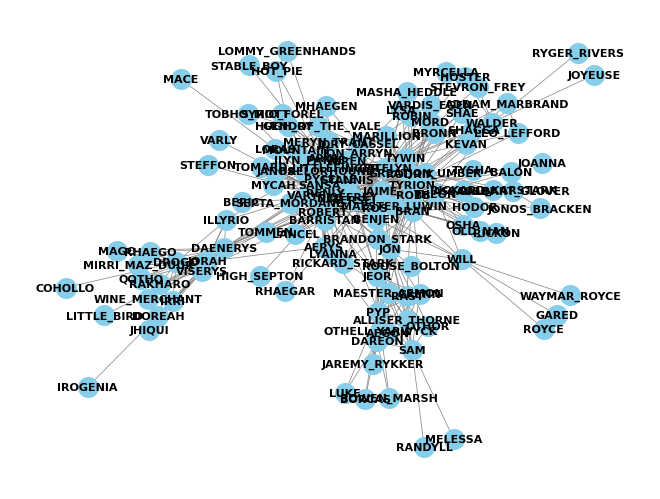

In [11]:
nx.draw(G1, with_labels=True, node_size=200, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', edge_color='gray', width=0.5)

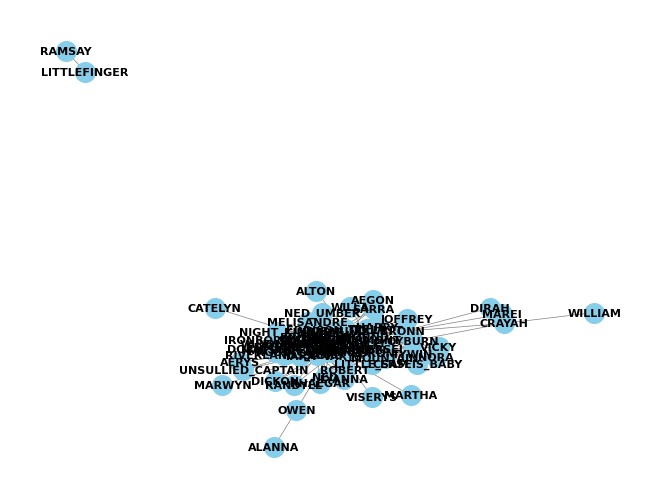

In [12]:
nx.draw(G8, with_labels=True, node_size=200, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', edge_color='gray', width=0.5)

# Primeira etapa da atividade somativa: Comparação das redes

In [15]:
## Grafos das temporadas:
G1 = nx.Graph()
G8 = nx.Graph()

In [16]:
# Adicionar arestas aos grafos com base no peso das conexões
G1.add_weighted_edges_from([(row['Source'], row['Target'], row['Weight']) for _, row in S1.iterrows()])
G8.add_weighted_edges_from([(row['Source'], row['Target'], row['Weight']) for _, row in S8.iterrows()])

In [17]:
# Distribuição de graus
distribuicao_S1 = [degree for _, degree in G1.degree()]
distribuicao_S8 = [degree for _, degree in G8.degree()]

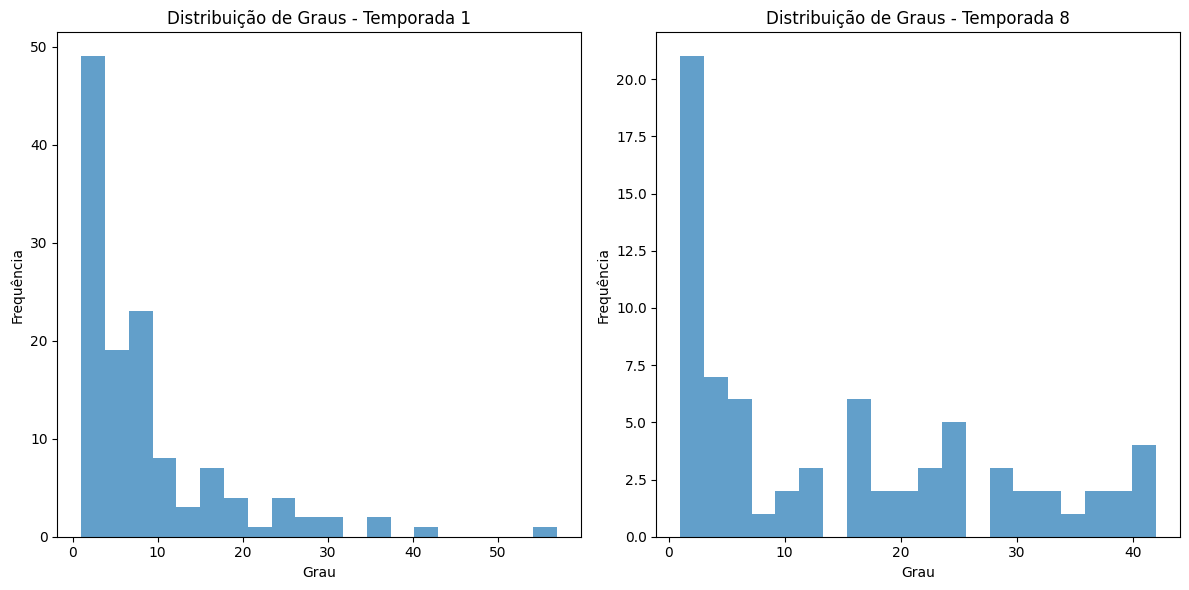

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(distribuicao_S1, bins=20, alpha=0.7)
plt.title('Distribuição de Graus - Temporada 1')
plt.xlabel('Grau')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(distribuicao_S8, bins=20, alpha=0.7)
plt.title('Distribuição de Graus - Temporada 8')
plt.xlabel('Grau')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

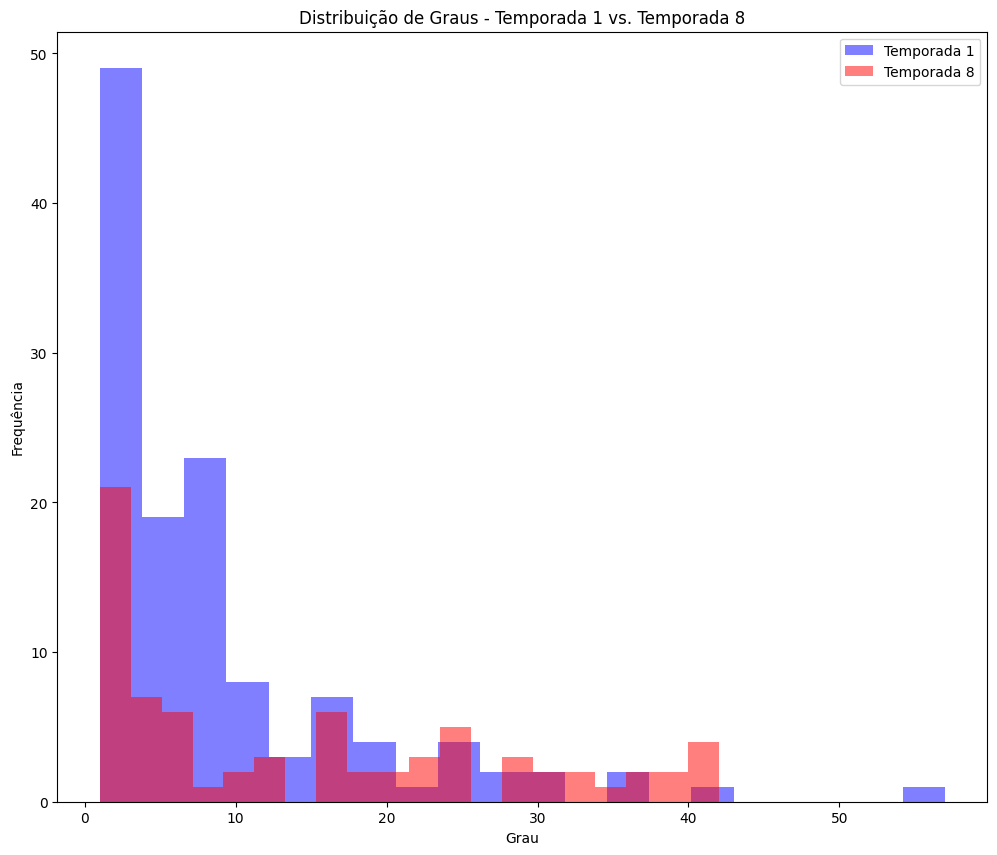

In [27]:
# tentativa de mostrar sobreposição das distribuições:
plt.figure(figsize=(12, 10))

plt.hist(distribuicao_S1, bins=20, alpha=0.5, color='blue', label='Temporada 1')
plt.hist(distribuicao_S8, bins=20, alpha=0.5, color='red', label='Temporada 8')

plt.title('Distribuição de Graus - Temporada 1 vs. Temporada 8')
plt.xlabel('Grau')
plt.ylabel('Frequência')
plt.legend()

plt.show()

In [19]:
# Grau médio
grau_medio_S1 = sum(distribuicao_S1) / len(distribuicao_S1)
grau_medio_S8 = sum(distribuicao_S8) / len(distribuicao_S8)


In [20]:
# Densidade
densidade_S1 = nx.density(G1)
densidade_S8 = nx.density(G8)

In [21]:
# Transitividade
tran_S1 = nx.transitivity(G1)
tran_S8 = nx.transitivity(G8)

In [22]:
print("Tarefa 1:")
print("Grau Médio - Temporada 1:", grau_medio_S1)
print("Grau Médio - Temporada 8:", grau_medio_S8)
print("Densidade - Temporada 1:", densidade_S1)
print("Densidade - Temporada 8:", densidade_S8)
print("Transitividade - Temporada 1:", tran_S1)
print("Transitividade - Temporada 8:", tran_S8)

Tarefa 1:
Grau Médio - Temporada 1: 8.714285714285714
Grau Médio - Temporada 8: 14.945945945945946
Densidade - Temporada 1: 0.06971428571428571
Densidade - Temporada 8: 0.20473898556090336
Transitividade - Temporada 1: 0.38325183374083127
Transitividade - Temporada 8: 0.6441837028505615


In [23]:
'''
- O grau médio na Temporada 8 (14.95) é significativamente maior do que na Temporada 1 (8.71), o que sugere que, na Temporada 8, os personagens interagem mais frequentemente em comparação com a Temporada 1.

- A densidade da rede na Temporada 8 (0.2047) é consideravelmente maior do que na Temporada 1 (0.0697).
  Isso indica que há mais conexões em relação ao número total possível de conexões na rede na Temporada 8, tornando-a mais densa.

- A transitividade é uma medida que indica o grau de agrupamento de vértices em uma rede.
  Na Temporada 8, a transitividade é consideravelmente maior (0.6442) em comparação com a Temporada 1 (0.3833). Isso sugere que na Temporada 8, os personagens tendem a formar grupos ou comunidades mais fechadas.

- Essas diferenças podem refletir a evolução da trama ao longo das temporadas, com um aumento na interação e complexidade das relações entre personagens na Temporada 8 em comparação com a Temporada 1.
  Isso pode ser resultado do desenvolvimento da história e da introdução de novos personagens e enredos ao longo da série.
'''




'\n- O grau médio na Temporada 8 (14.95) é significativamente maior do que na Temporada 1 (8.71), o que sugere que, na Temporada 8, os personagens interagem mais frequentemente em comparação com a Temporada 1.\n\n- A densidade da rede na Temporada 8 (0.2047) é consideravelmente maior do que na Temporada 1 (0.0697). \n  Isso indica que há mais conexões em relação ao número total possível de conexões na rede na Temporada 8, tornando-a mais densa.\n\n- A transitividade é uma medida que indica o grau de agrupamento de vértices em uma rede. \n  Na Temporada 8, a transitividade é consideravelmente maior (0.6442) em comparação com a Temporada 1 (0.3833). Isso sugere que na Temporada 8, os personagens tendem a formar grupos ou comunidades mais fechadas.\n\n- Essas diferenças podem refletir a evolução da trama ao longo das temporadas, com um aumento na interação e complexidade das relações entre personagens na Temporada 8 em comparação com a Temporada 1. \n  Isso pode ser resultado do desenvolv

# Segunda etapa da atividade Somativa: Identificação dos personagens centrais

In [28]:
## Calculo dos parametros:

# Centralidade de Grau
centralidade_S1 = nx.degree_centrality(G1)
centralidade_S8 = nx.degree_centrality(G8)

# Centralidade de Intermediação
between_S1 = nx.betweenness_centrality(G1)
between_S8 = nx.betweenness_centrality(G8)

# Centralidade de Proximidade
proximidade_S1 = nx.closeness_centrality(G1)
proximidade_S8 = nx.closeness_centrality(G8)

# Centralidade de Autovetor
eigen_S1 = nx.eigenvector_centrality(G1)
eigen_S8 = nx.eigenvector_centrality(G8)



In [29]:
# Encontrar os 3 personagens mais centrais em cada temporada para cada medida de centralidade
maior_grau_S1 = sorted(centralidade_S1.items(), key=lambda x: x[1], reverse=True)[:3]
maior_grau_S8 = sorted(centralidade_S8.items(), key=lambda x: x[1], reverse=True)[:3]

maior_between_S1 = sorted(between_S1.items(), key=lambda x: x[1], reverse=True)[:3]
maior_between_S8 = sorted(between_S8.items(), key=lambda x: x[1], reverse=True)[:3]

maior_proximidade_S1 = sorted(proximidade_S1.items(), key=lambda x: x[1], reverse=True)[:3]
maior_proximidade_S8 = sorted(proximidade_S8.items(), key=lambda x: x[1], reverse=True)[:3]

maior_eigen_S1 = sorted(eigen_S1.items(), key=lambda x: x[1], reverse=True)[:3]
maior_eigen_S8 = sorted(eigen_S8.items(), key=lambda x: x[1], reverse=True)[:3]

In [30]:
print("Tarefa 2:")
print("Personagens mais centrais em Temporada 1 (por grau):", [p[0] for p in maior_grau_S1])
print("Personagens mais centrais em Temporada 8 (por grau):", [p[0] for p in maior_grau_S8])
print("Personagens mais centrais em Temporada 1 (por intermediação):", [p[0] for p in maior_between_S1])
print("Personagens mais centrais em Temporada 8 (por intermediação):", [p[0] for p in maior_between_S8])
print("Personagens mais centrais em Temporada 1 (por proximidade):", [p[0] for p in maior_proximidade_S1])
print("Personagens mais centrais em Temporada 8 (por proximidade):", [p[0] for p in maior_proximidade_S8])
print("Personagens mais centrais em Temporada 1 (por autovetor):", [p[0] for p in maior_eigen_S1])
print("Personagens mais centrais em Temporada 8 (por autovetor):", [p[0] for p in maior_eigen_S8])

Tarefa 2:
Personagens mais centrais em Temporada 1 (por grau): ['NED', 'TYRION', 'ROBERT']
Personagens mais centrais em Temporada 8 (por grau): ['SAM', 'DAENERYS', 'TYRION']
Personagens mais centrais em Temporada 1 (por intermediação): ['NED', 'TYRION', 'CATELYN']
Personagens mais centrais em Temporada 8 (por intermediação): ['DAENERYS', 'SAM', 'ARYA']
Personagens mais centrais em Temporada 1 (por proximidade): ['NED', 'ROBERT', 'CATELYN']
Personagens mais centrais em Temporada 8 (por proximidade): ['SAM', 'DAENERYS', 'TYRION']
Personagens mais centrais em Temporada 1 (por autovetor): ['NED', 'ROBERT', 'CERSEI']
Personagens mais centrais em Temporada 8 (por autovetor): ['TYRION', 'SAM', 'SANSA']


In [31]:
'''

Temporada 1:

Por Grau:
NED
TYRION
ROBERT

Por Intermediação:
NED
TYRION
CATELYN

Por Proximidade:
NED
ROBERT
CATELYN

Por Autovetor:
NED
ROBERT
CERSEI

-- Temporada 8:

Por Grau:
SAM
DAENERYS
TYRION

Por Intermediação:
DAENERYS
SAM
ARYA

Por Proximidade:
SAM
DAENERYS
TYRION

Por Autovetor:
TYRION
SAM
SANSA

É interessante notar como os personagens mais centrais variam entre as temporadas e as diferentes medidas de centralidade.
Isso pode refletir mudanças na dinâmica da trama ao longo da série e nas interações dos personagens.
Por exemplo, personagens que podem ter sido centrais em uma temporada podem não desempenhar o mesmo papel em temporadas posteriores, à medida que a história se desenvolve.

'''

'\n\nTemporada 1:\n\nPor Grau:\nNED\nTYRION\nROBERT\n\nPor Intermediação:\nNED\nTYRION\nCATELYN\n\nPor Proximidade:\nNED\nROBERT\nCATELYN\n\nPor Autovetor:\nNED\nROBERT\nCERSEI\n\n-- Temporada 8:\n\nPor Grau:\nSAM\nDAENERYS\nTYRION\n\nPor Intermediação:\nDAENERYS\nSAM\nARYA\n\nPor Proximidade:\nSAM\nDAENERYS\nTYRION\n\nPor Autovetor:\nTYRION\nSAM\nSANSA\n\nÉ interessante notar como os personagens mais centrais variam entre as temporadas e as diferentes medidas de centralidade.\nIsso pode refletir mudanças na dinâmica da trama ao longo da série e nas interações dos personagens. \nPor exemplo, personagens que podem ter sido centrais em uma temporada podem não desempenhar o mesmo papel em temporadas posteriores, à medida que a história se desenvolve.\n\n'

# Etapa 3: Detecção de comunidades

In [32]:
# importar o método de Louvavain
from community import community_louvain

In [33]:
# Detecção de comunidades
lou_S1 = community_louvain.best_partition(G1)
lou_S8 = community_louvain.best_partition(G8)

<ipython-input-36-d896806f45ac>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  nx.draw(G1, posi_S1, node_color=cor_S1, cmap=plt.cm.get_cmap("viridis"), with_labels=True)
<ipython-input-36-d896806f45ac>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  nx.draw(G8, posi_S8, node_color=cor_S8, cmap=plt.cm.get_cmap("viridis"), with_labels=True)


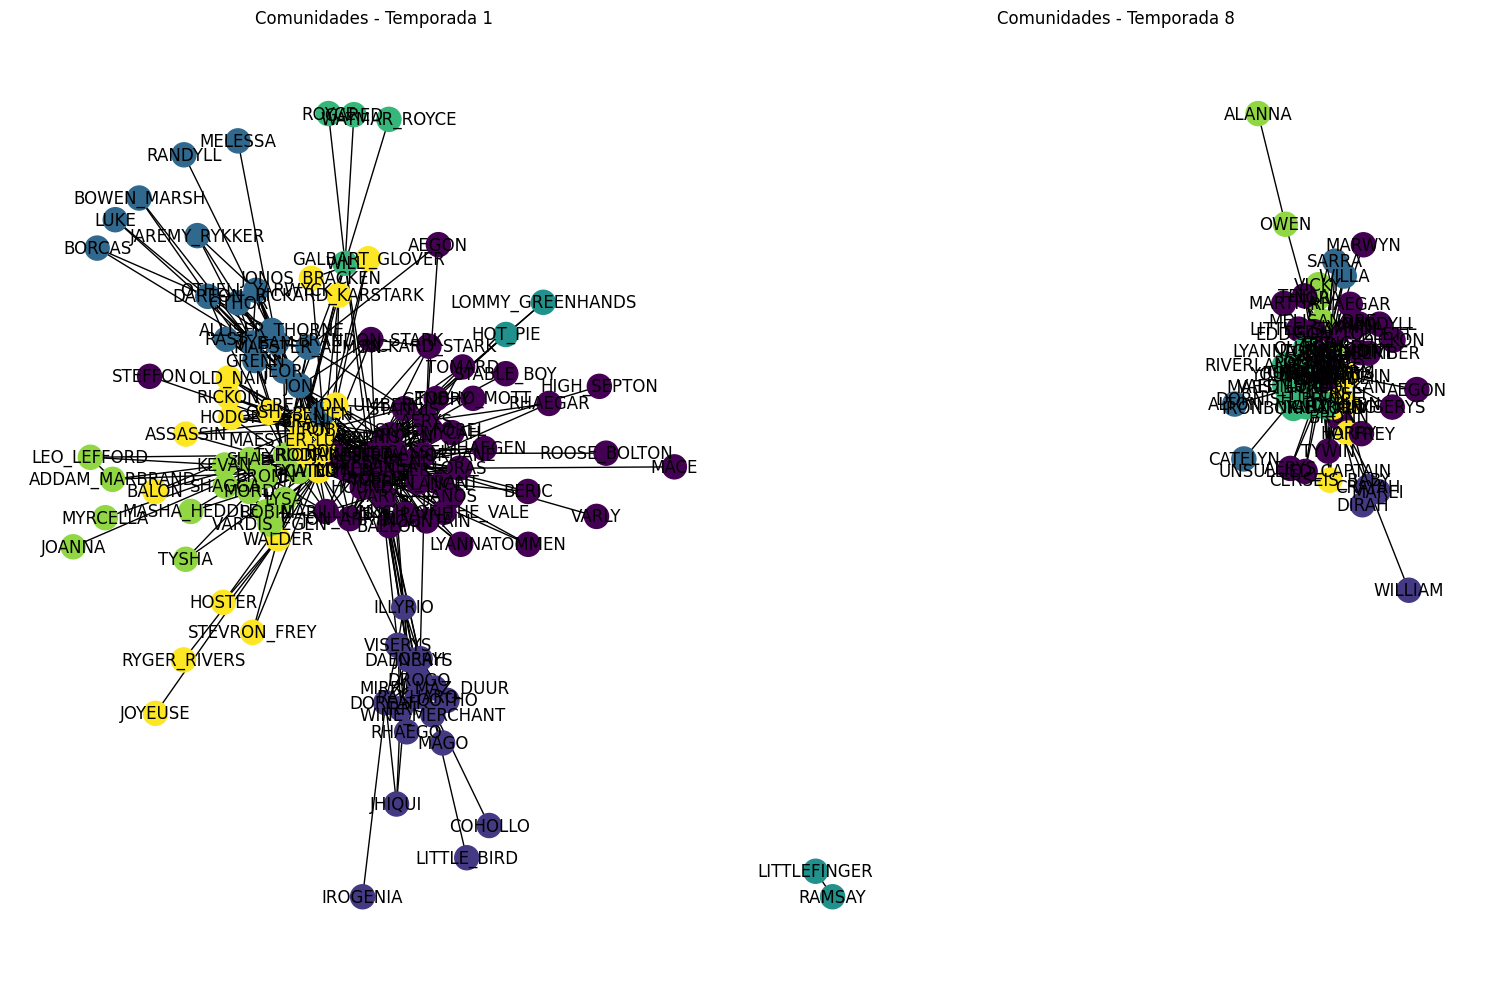

In [36]:
# Desenhar os grafos com vértices coloridos por comunidade
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
posi_S1 = nx.spring_layout(G1)
cor_S1 = [lou_S1[node] for node in G1.nodes()]
nx.draw(G1, posi_S1, node_color=cor_S1, cmap=plt.cm.get_cmap("viridis"), with_labels=True)
plt.title('Comunidades - Temporada 1')

plt.subplot(1, 2, 2)
posi_S8 = nx.spring_layout(G8)
cor_S8 = [lou_S8[node] for node in G8.nodes()]
nx.draw(G8, posi_S8, node_color=cor_S8, cmap=plt.cm.get_cmap("viridis"), with_labels=True)
plt.title('Comunidades - Temporada 8')

plt.tight_layout()
plt.show()

In [41]:
# Número de comunidades
n_comunidades_S1 = len(set(lou_S1.values()))
n_comunidades_S8 = len(set(lou_S8.values()))


In [42]:
print("Tarefa 3:")
print("Número de comunidades em Temporada 1:", n_comunidades_S1)
print("Número de comunidades em Temporada 8:", n_comunidades_S8)

Tarefa 3:
Número de comunidades em Temporada 1: 7
Número de comunidades em Temporada 8: 7


# Na tarefa 3, ambas as temporadas têm um total de 7 comunidades.
## Embora graficamente a estrutura dos grafos pareça bastante divergente, em termos de detecção de comunidades, as duas temporadas têm uma estrutura de rede semelhante, com personagens agrupados em conjuntos distintos em ambas as temporadas.


In [43]:
# A célula a seguir é utilizada para tornar o arquivo em HTML:

In [ ]:
%%shell
jupyter nbconvert --to html /content/ATP1_TOMAZINI_ER_ModeloBasketClassificacao.ipynb